In [1]:
import os
import sys
import csv
import logging
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [3]:
process_directory(os.getcwd(), 'ex02.1')
process_directory(os.getcwd(), 'ex02.2')
process_directory(os.getcwd(), 'ex02.3')

In [4]:
def group_results_df(averages_df, compared_col, title, binary=False):
    means = calculate_column_means_against_base(averages_df, compared_col)
    if title == 'RMS':
        prop = calculate_percentages_against_base(averages_df, compared_col, flipped=True)
    else:
        prop = calculate_percentages_against_base(averages_df, compared_col)

    means.update({'title': title, 'metric': 'mean'})
    prop.update({'title': title, 'metric': 'proportion'})
    
    return means, prop

    
def plot_distributions(ax, df, title):
    for column in df.columns:
        if 'Unnamed' not in column and column != 'rep' and column != 'Game':
            sns.kdeplot(df[column], ax=ax, label=column)
    
    ax.set_title(f'{title} Distributions')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

def visualize_results(base_path, compared_col, binary=False):
    # Read the summary CSV files
    log_likelihood_df = pd.read_csv(os.path.join(base_path, 'log_likelihood_summary.csv'))
    leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path, 'leadership_log_likelihood_summary.csv'))
    rms_df = pd.read_csv(os.path.join(base_path, 'rms_summary.csv'))
    rho_df = pd.read_csv(os.path.join(base_path, 'rho_summary.csv'))

    # List of dataframes and their titles
    dataframes = [
        (log_likelihood_df, 'Log Likelihood'),
        (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
        (rms_df, 'RMS'),
        (rho_df, 'Rho')
    ]

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    results = []
    for i, (df, title) in enumerate(dataframes):
        if binary:
            df = df[['spring_rank', 'page_rank', 'point_wise', 'newman']]
        means, prop = group_results_df(df, compared_col, title, binary)
        plot_distributions(axes[i], df, title)
        results.extend([means, prop])

    # Convert results to a DataFrame for better visualization
    results_df = pd.DataFrame(results).T
 
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    print(results_df)
        

    plt.tight_layout()
    plt.show()


# Standard 

                          0               1                          2  \
spring_rank       -0.106894             0.0                  -0.106894   
page_rank         -0.635383             0.0                  -0.635383   
point_wise        -0.161363             0.0                  -0.161363   
title        Log Likelihood  Log Likelihood  Leadership Log Likelihood   
metric                 mean      proportion                       mean   

                                     3         4           5         6  \
spring_rank                        0.0    0.7633         0.0  -0.02563   
page_rank                          0.0  1.669547         0.0 -1.726997   
point_wise                         0.0  0.907027         0.0 -0.025573   
title        Leadership Log Likelihood       RMS         RMS       Rho   
metric                      proportion      mean  proportion      mean   

                      7  
spring_rank         0.0  
page_rank           0.0  
point_wise          0.0  
title 

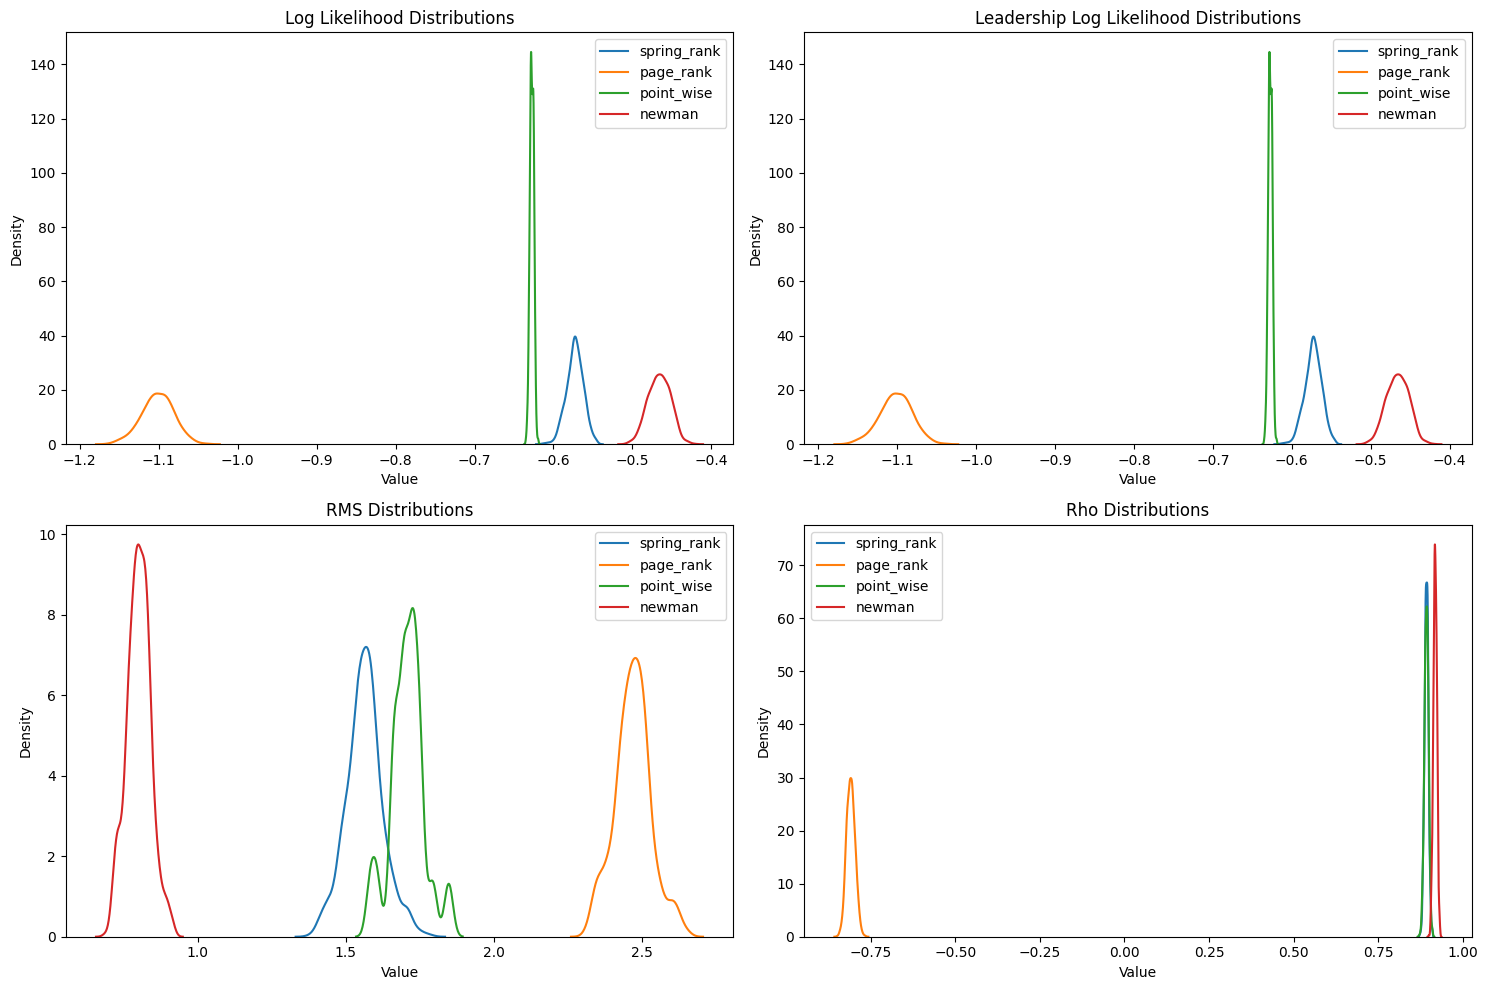

In [5]:
path = os.path.join(os.getcwd(), 'results', 'ex02.1')
visualize_results(path, compared_col='newman', binary=True)

# Higher Order 

                                      0               1  \
newman                        -0.011438           0.006   
newman_leadership             -1.386394             0.0   
higher_order_leadership        -0.89102             0.0   
spring_rank                     -0.1626             0.0   
spring_rank_leadership        -0.232052             0.0   
page_rank                      -0.62295             0.0   
page_rank_leadership          -0.654923             0.0   
point_wise                    -0.081076             0.0   
title                    Log Likelihood  Log Likelihood   
metric                             mean      proportion   

                                                 2                          3  \
newman                                    0.046139                        1.0   
newman_leadership                         0.193853                        1.0   
higher_order_leadership                    0.20248                        1.0   
spring_rank               

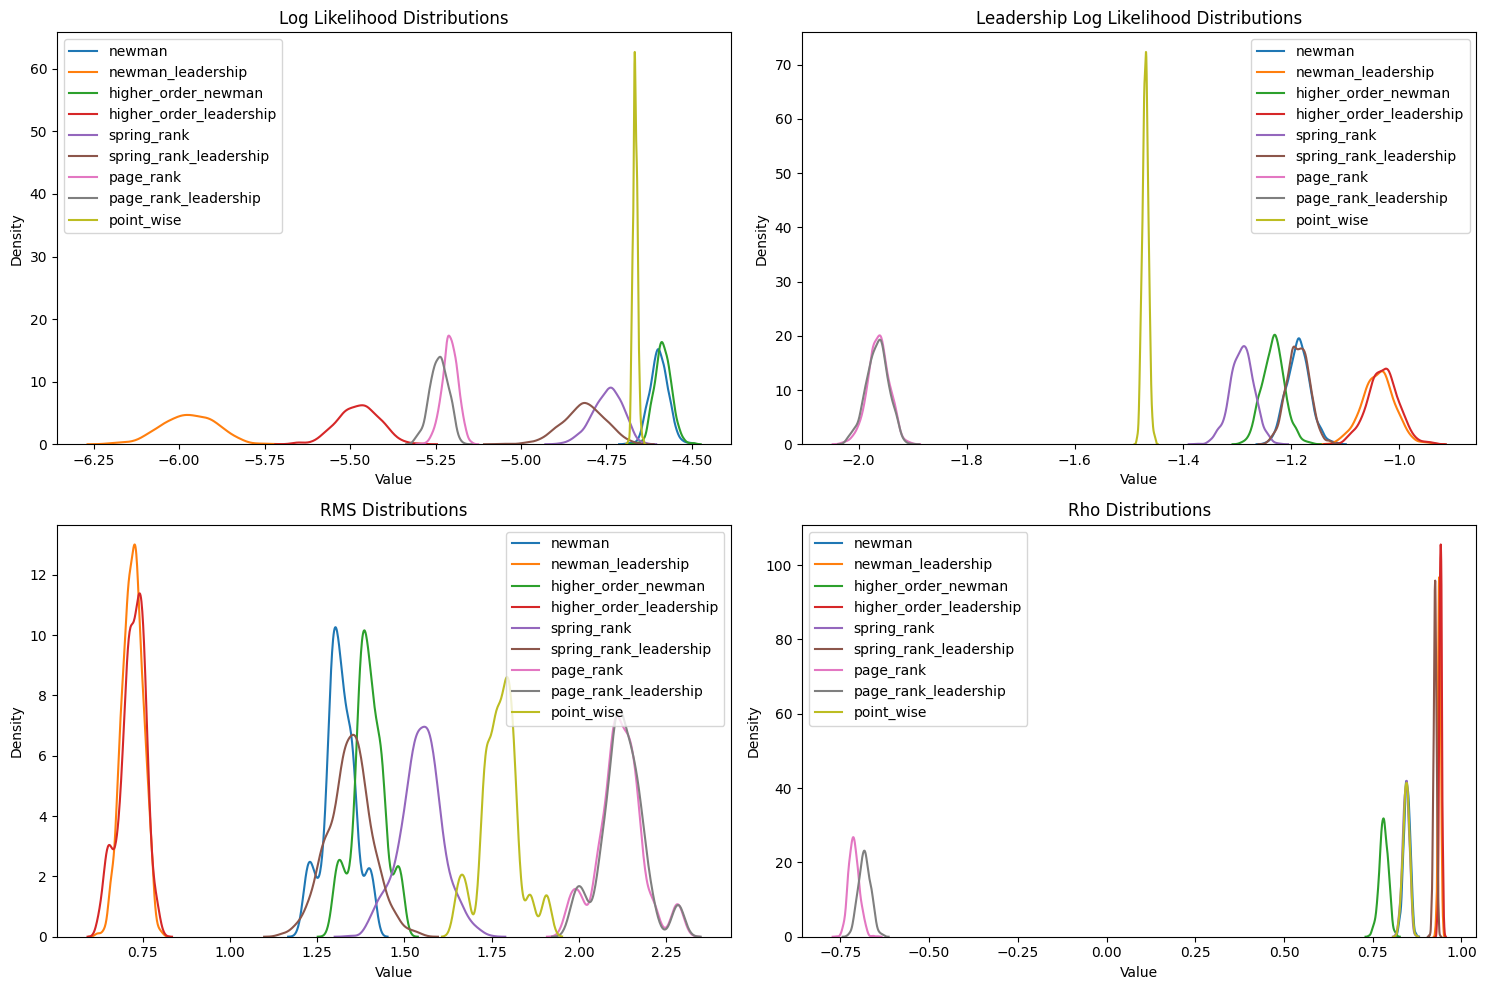

In [6]:
path = os.path.join(os.getcwd(), 'results', 'ex02.2')
visualize_results(path, compared_col='higher_order_newman')

# Higher Order Leadership

                                     0               1  \
newman                        0.881725             1.0   
newman_leadership            -0.496869             0.0   
higher_order_newman            0.89341             1.0   
spring_rank                   0.728383             1.0   
spring_rank_leadership        0.659086             1.0   
page_rank                     0.271469             1.0   
page_rank_leadership          0.240357             1.0   
point_wise                    0.813203             1.0   
title                   Log Likelihood  Log Likelihood   
metric                            mean      proportion   

                                                2                          3  \
newman                                  -0.155188                        0.0   
newman_leadership                       -0.008939                      0.006   
higher_order_newman                     -0.201172                        0.0   
spring_rank                             -

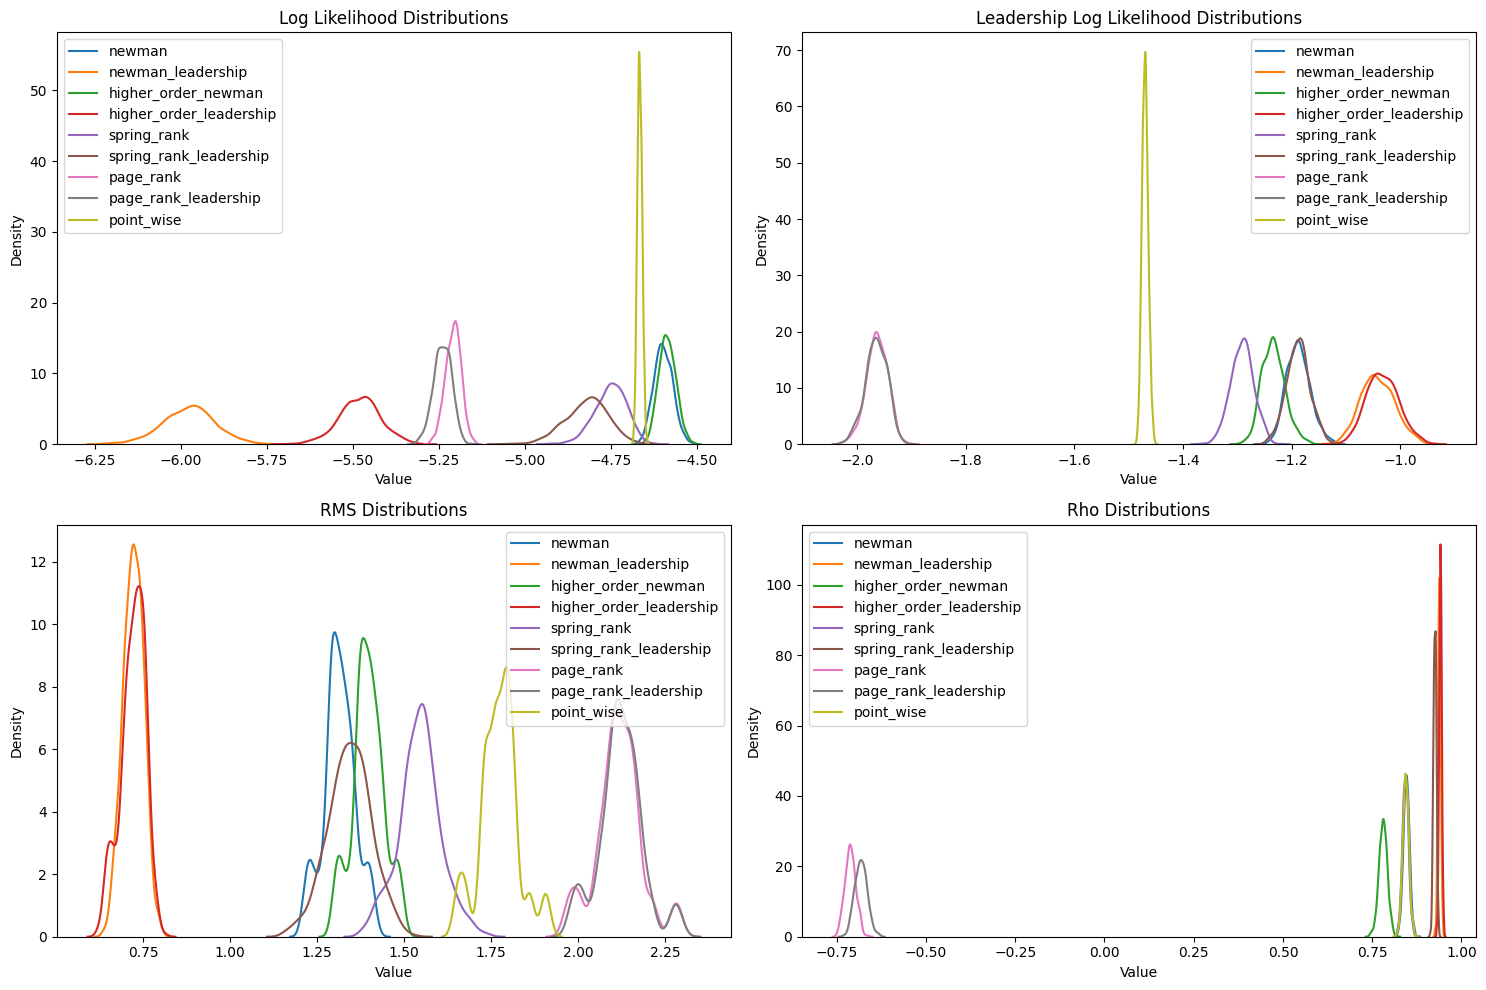

In [7]:
path = os.path.join(os.getcwd(), 'results', 'ex02.3')
visualize_results(path, compared_col='higher_order_leadership')